In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('iris.data',header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [88]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [93]:
clf = LinearDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены
clf.priors_

3


array([0.38666667, 0.26666667, 0.34666667])

In [75]:
clf.score(X_train, y_train)

0.9866666666666667

In [70]:
def plot_clf(clf, title=""):
    test_sizes = np.arange(0.05, 0.95, 0.05)
    wrong_results = []
    scores = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=630405)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        wrong_results.append((y_test != y_pred).sum())
        scores.append(clf.score(X_test, y_test))


    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(test_sizes, wrong_results)
    axs[1].plot(test_sizes, scores)
    axs[0].set_ylabel('Количество неправильно определенных наблюдений')
    axs[1].set_ylabel('Точность классификации')
    axs[0].set_xlabel('Размер выборки')
    axs[1].set_xlabel('Размер выборки')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

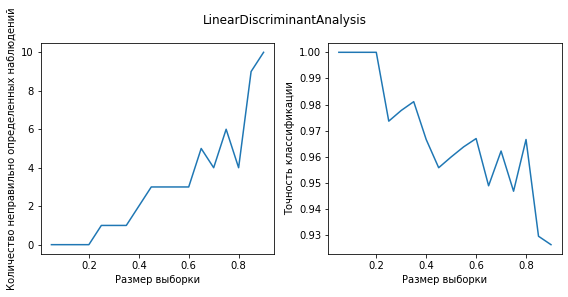

In [72]:
plot_clf(LinearDiscriminantAnalysis(), 'LinearDiscriminantAnalysis')

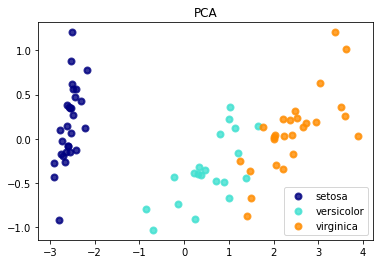

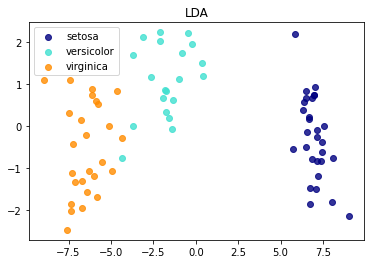

In [33]:
target_names = ['setosa', 'versicolor', 'virginica']
y = y_train

pca = PCA(n_components=2)
X_r = pca.fit(X_train).transform(X_train)

X_r2 = clf.transform(X_train)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()

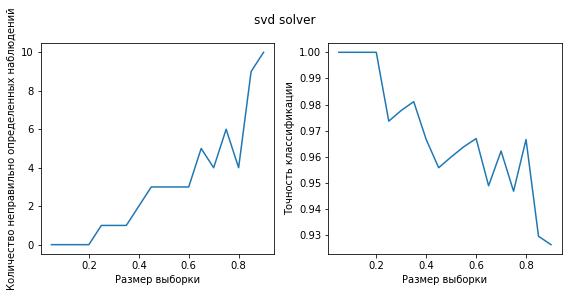

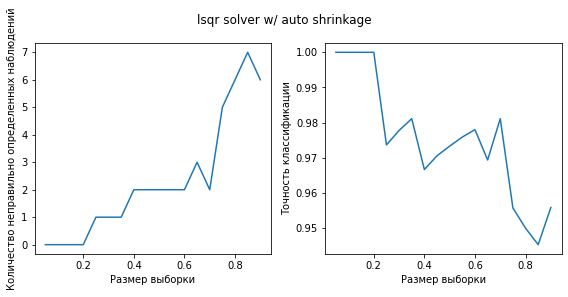

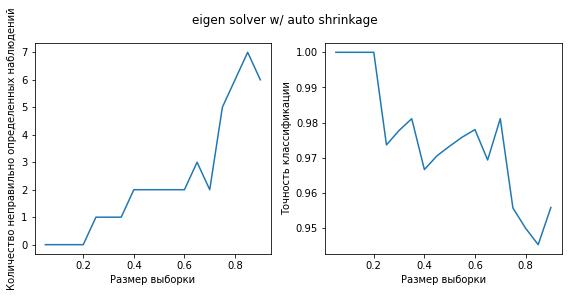

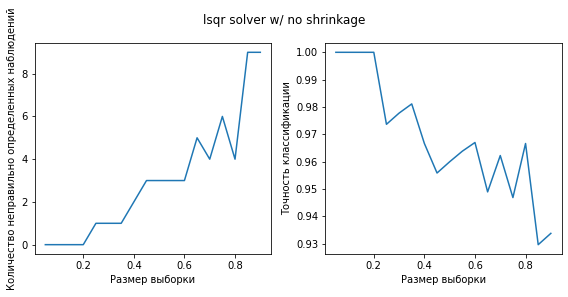

In [40]:
test_sizes = np.arange(0.05, 0.95, 0.05)
wrong_results_1 = []
scores_1 = []
wrong_results_2 = []
scores_2 = []
wrong_results_3 = []
scores_3 = []
wrong_results_4 = []
scores_4 = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=630405)

    clf_1 = LinearDiscriminantAnalysis(solver='svd', shrinkage=None)
    y_pred = clf_1.fit(X_train, y_train).predict(X_test)
    wrong_results_1.append((y_test != y_pred).sum())
    scores_1.append(clf_1.score(X_test, y_test))

    clf_2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
    y_pred = clf_2.fit(X_train, y_train).predict(X_test)
    wrong_results_2.append((y_test != y_pred).sum())
    scores_2.append(clf_2.score(X_test, y_test))

    clf_3 = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
    y_pred = clf_3.fit(X_train, y_train).predict(X_test)
    wrong_results_3.append((y_test != y_pred).sum())
    scores_3.append(clf_3.score(X_test, y_test))

    clf_4 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None)
    y_pred = clf_4.fit(X_train, y_train).predict(X_test)
    wrong_results_4.append((y_test != y_pred).sum())
    scores_4.append(clf_4.score(X_test, y_test))


fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(test_sizes, wrong_results_1)
axs[1].plot(test_sizes, scores_1)
axs[0].set_ylabel('Количество неправильно определенных наблюдений')
axs[1].set_ylabel('Точность классификации')
axs[0].set_xlabel('Размер выборки')
axs[1].set_xlabel('Размер выборки')
fig.suptitle('svd solver')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(test_sizes, wrong_results_2)
axs[1].plot(test_sizes, scores_2)
axs[0].set_ylabel('Количество неправильно определенных наблюдений')
axs[1].set_ylabel('Точность классификации')
axs[0].set_xlabel('Размер выборки')
axs[1].set_xlabel('Размер выборки')
fig.suptitle('lsqr solver w/ auto shrinkage')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(test_sizes, wrong_results_3)
axs[1].plot(test_sizes, scores_3)
axs[0].set_ylabel('Количество неправильно определенных наблюдений')
axs[1].set_ylabel('Точность классификации')
axs[0].set_xlabel('Размер выборки')
axs[1].set_xlabel('Размер выборки')
fig.suptitle('eigen solver w/ auto shrinkage')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(test_sizes, wrong_results_4)
axs[1].plot(test_sizes, scores_4)
axs[0].set_ylabel('Количество неправильно определенных наблюдений')
axs[1].set_ylabel('Точность классификации')
axs[0].set_xlabel('Размер выборки')
axs[1].set_xlabel('Размер выборки')
fig.suptitle('lsqr solver w/ no shrinkage')
plt.tight_layout()
plt.show()

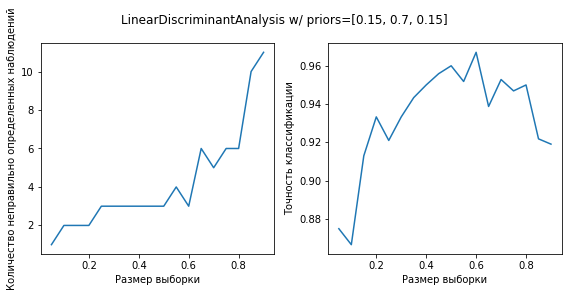

In [97]:
plot_clf(LinearDiscriminantAnalysis(priors=[0.15, 0.7, 0.15]), 'LinearDiscriminantAnalysis w/ priors=[0.15, 0.7, 0.15]')

In [94]:
clf = LinearDiscriminantAnalysis(priors=[0.15, 0.7, 0.15])
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены
clf.priors_

5


array([0.15, 0.7 , 0.15])

In [95]:
clf.score(X_train, y_train)

0.9866666666666667

In [108]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

4
0.96


In [109]:
clf = svm.SVC(kernel='linear')
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

2
0.9733333333333334


In [111]:
clf = svm.SVC(kernel='sigmoid')
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

54
0.38666666666666666


In [112]:
clf = svm.SVC(kernel='poly')
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

6
0.9866666666666667


In [114]:
clf = svm.SVC(kernel='poly')
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

6
0.9866666666666667


In [141]:
clf = svm.SVC(max_iter=6)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

3
0.9733333333333334


In [103]:
print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

[[4.5 2.3 1.3 0.3]
 [5.4 3.9 1.7 0.4]
 [5.1 3.3 1.7 0.5]
 [5.  3.  1.6 0.2]
 [5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.7 2.9 4.2 1.3]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.6 3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [6.7 3.  5.  1.7]
 [5.5 2.4 3.7 1. ]
 [6.6 2.9 4.6 1.3]
 [5.6 3.  4.1 1.3]
 [5.9 3.2 4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [5.9 3.  5.1 1.8]
 [6.4 2.8 5.6 2.1]
 [6.5 3.2 5.1 2. ]
 [6.2 3.4 5.4 2.3]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [7.2 3.  5.8 1.6]
 [7.9 3.8 6.4 2. ]
 [6.  3.  4.8 1.8]
 [6.4 3.2 5.3 2.3]
 [6.7 3.  5.2 2.3]
 [5.8 2.7 5.1 1.9]
 [6.3 2.9 5.6 1.8]]
[16 26 36 59  2  4  6 33 34 37 40 42 54 57 58 60 64 65 66 67  1 11 14 17
 19 20 23 41 44 55 56 62 71]
[ 4 16 13]


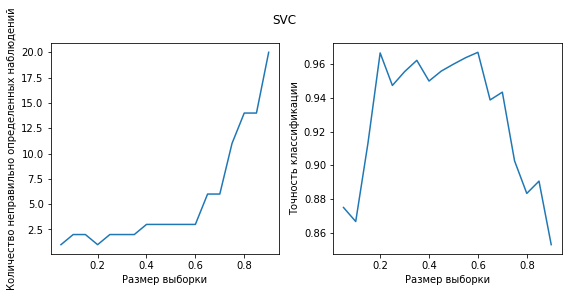

In [107]:
plot_clf(svm.SVC(), 'SVC')

In [143]:
clf = svm.NuSVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

4
0.96


In [144]:
clf = svm.LinearSVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_train, y_train))

6
0.9733333333333334


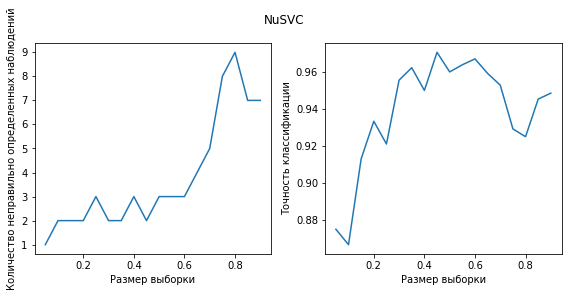

In [146]:
plot_clf(svm.NuSVC(), 'NuSVC')

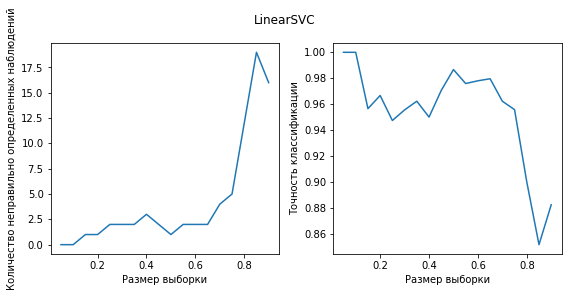

In [149]:
plot_clf(svm.LinearSVC(), 'LinearSVC')

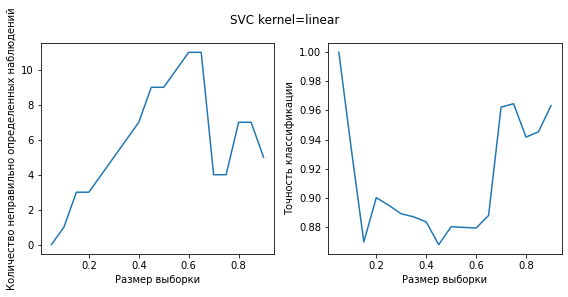

In [153]:
plot_clf(svm.SVC(kernel='linear', max_iter=1), 'SVC kernel=linear')

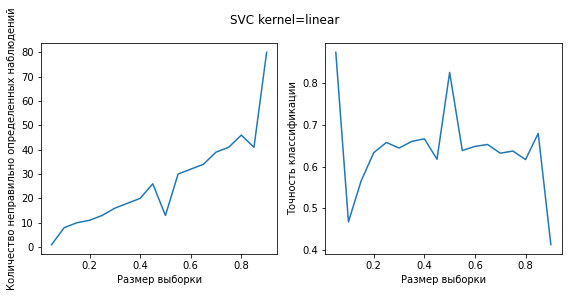

In [155]:
plot_clf(svm.LinearSVC(max_iter=1), 'SVC kernel=linear')